# Introduction

Health insurance costs can vary significantly based on multiple factors, such as age, gender, body mass index (BMI), smoking habits, and the region where an individual lives. Accurate prediction of medical insurance costs is critical for insurance companies to set fair premiums and for individuals to manage their healthcare expenses.

This project aims to build a machine learning model to predict medical insurance costs based on various individual characteristics. By leveraging regression techniques, the model will help provide more accurate cost estimates for both insurers and policyholders.

# Objective

The primary objective of this project is to develop a predictive model that estimates the medical insurance costs for individuals based on features such as age, BMI, smoking habits, and other demographic factors. The model will help in identifying key drivers of medical costs.

# Problem Statement

How can we accurately predict the medical insurance costs based on personal and health-related factors? Understanding these factors is crucial for both insurance companies to price their policies effectively and for individuals to anticipate their medical expenses

# Data Wrangling

## Load Dataset

In [325]:
#Import pandas to read the dataset
import pandas as pd

#Load the dataset
df = pd.read_csv("D:/Data science/Dataset/Medical Cost Insurance/insurance.csv")

#Display the top five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


# Data Understanding

In [327]:
#Display full the dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


## Description

The dataset contains the following features:

Age: The age of the individual (numerical).

Sex: The gender of the individual (male or female).

BMI: Body Mass Index, a measure of body fat based on height and weight (numerical).

Children: Number of dependents covered by the insurance (numerical).

Smoker: Whether the individual is a smoker (yes or no).

Region: The residential region of the individual (northeast, northwest, southeast, southwest).

Charges: The actual medical insurance costs incurred (target variable, numerical).

The dataset consists of 1338 rows and 7 columns, sourced from Kaggle. The goal is to predict the charges column.

In [330]:
#Check null for each column
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [331]:
#Check duplicated rows

print('Num of duplicated rows:', df.duplicated().sum())

Num of duplicated rows: 1


In [332]:
#Display the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [333]:
#Collect the categorical columns
cat = df.select_dtypes(include='object').columns.tolist()

#Check unique values for each categorical column

for i in cat:
    print(f'Uniqe values in {i} column:', df[i].unique())

Uniqe values in sex column: ['female' 'male']
Uniqe values in smoker column: ['yes' 'no']
Uniqe values in region column: ['southwest' 'southeast' 'northwest' 'northeast']


## Summary the Dataset

In [335]:
#Create a function to summary the data
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['missing'] = df.isnull().sum().values
    summry['Duplicate'] = df.duplicated().sum()
    summry['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['min'] = desc['min'].values
    summry['max'] = desc['max'].values
    summry['avg'] = desc['mean'].values
    summry['std dev'] = desc['std'].values
    summry['top value'] = desc['top'].values
    summry['Freq'] = desc['freq'].values

    return summry

summary(df).style.set_caption("**Summary Data**").\
background_gradient(cmap='Pastel2_r', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
age,int64,0,1,47,18.000000,64.000000,39.207025,14.049960,nan,nan
sex,object,0,1,2,nan,nan,nan,nan,male,676
bmi,float64,0,1,548,15.960000,53.130000,30.663397,6.098187,nan,nan
children,int64,0,1,6,0.000000,5.000000,1.094918,1.205493,nan,nan
smoker,object,0,1,2,nan,nan,nan,nan,no,1064
region,object,0,1,4,nan,nan,nan,nan,southeast,364
charges,float64,0,1,1337,1121.873900,63770.428010,13270.422265,12110.011237,nan,nan


In [336]:
pd.set_option("display.max_colwidth", None)

pd.DataFrame({
    "Columns":df.columns.values,
    'Data Type':df.dtypes.values,
    'Num of Null':df.isnull().sum()/len(df)*100,
    'Negative': [True if df[i].dtype == int and (df[i] < 0).any else False for
                 i in df.columns],
    'Num of unique':df.nunique().values,
    'Sample Unique': [df[i].unique() for i in df.columns]
})

,Columns,Data Type,Num of Null,Negative,Num of unique,Sample Unique
age,age,int64,0.00,False,47,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34, 59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64, 20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39]"
sex,sex,object,0.00,False,2,"[female, male]"
bmi,bmi,float64,0.00,False,548,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84, 26.22, 26.29, 34.4, 39.82, 42.13, 24.6, 30.78, 23.845, 40.3, 35.3, 36.005, 32.4, 34.1, 31.92, 28.025, 27.72, 23.085, 32.775, 17.385, 36.3, 35.6, 26.315, 28.6, 28.31, 36.4, 20.425, 32.965, 20.8, 36.67, 39.9, 26.6, 36.63, 21.78, 30.8, 37.05, 37.3, 38.665, 34.77, 24.53, 35.2, 35.625, 33.63, 28.0, 34.43, 28.69, 36.955, 31.825, 31.68, 22.88, 37.335, 27.36, 33.66, 24.7, 25.935, 22.42, 28.9, 39.1, 36.19, 23.98, 24.75, 28.5, 28.1, 32.01, 27.4, 34.01, 29.59, 35.53, 39.805, 26.885, 38.285, 37.62, 41.23, 34.8, 22.895, 31.16, 27.2, 26.98, 39.49, 24.795, 31.3, 38.28, 19.95, 19.3, 31.6, 25.46, 30.115, 29.92, 27.5, 28.4, 30.875, ...]"
children,children,int64,0.00,False,6,"[0, 1, 3, 2, 5, 4]"
smoker,smoker,object,0.00,False,2,"[yes, no]"
region,region,object,0.00,False,4,"[southwest, southeast, northwest, northeast]"
charges,charges,float64,0.00,False,1337,"[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14001.1338, 14451.83515, 12268.63225, 2775.19215, 38711.0, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43375, 15612.19335, 2302.3, 39774.2763, 48173.361, 3046.062, 4949.7587, 6272.4772, 6313.759, 6079.6715, 20630.28351, 3393.35635, 3556.9223, 12629.8967, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 8059.6791, 47496.49445, 13607.36875, 34303.1672, 23244.7902, 5989.52365, 8606.2174, 4504.6624, 30166.61817, 4133.64165, 14711.7438, 1743.214, 14235.072, 6389.37785, 5920.1041, 17663.1442, 16577.7795, 6799.458, 11741.726, 11946.6259, 7726.854, 11356.6609, 3947.4131, 1532.4697, 2755.02095, 6571.02435, 4441.21315, 7935.29115, 37165.1638, 11033.6617, 39836.519, 21098.55405, 43578.9394, 11073.176, 8026.6666, 11082.5772, 2026.9741, 10942.13205, 30184.9367, 5729.0053, 47291.055, 3766.8838, 12105.32, 10226.2842, 22412.6485, 15820.699, ...]"


# Exploratory Data Analysis (EDA)

In [338]:
#Import the packages and set them for exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_theme(style="white", context="notebook")
warnings.filterwarnings('ignore')

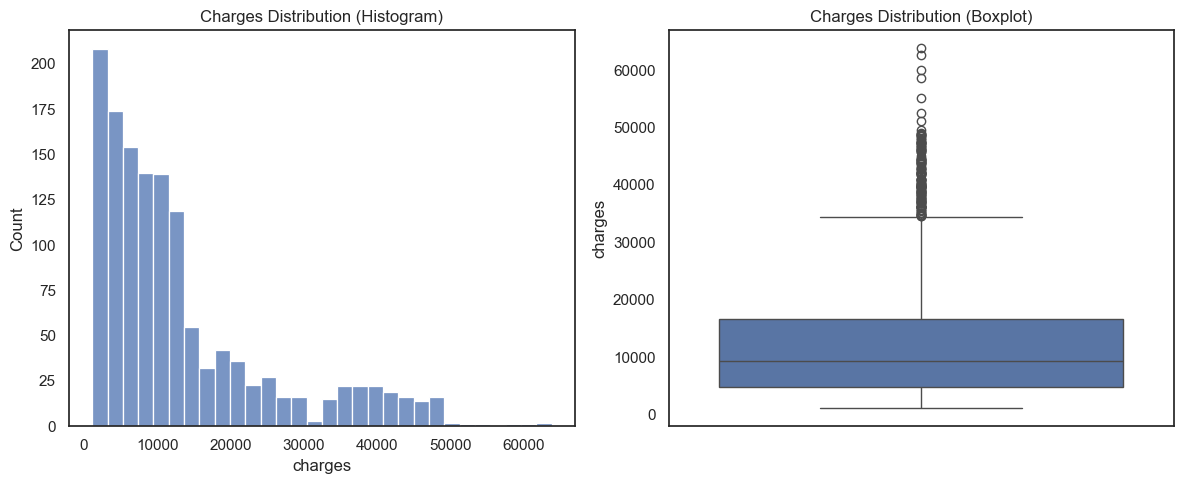

In [339]:
#Create a subplots consits 1 row and 2 columns
fig, axs = plt.subplots(1,2, figsize=(12,5))

#Visualize the distribution of charges data using histogram
sns.histplot(x=df['charges'], ax=axs[0])
axs[0].set_title("Charges Distribution (Histogram)")

#Visualize the distribution of charges data using boxplot
sns.boxplot(y=df['charges'], ax=axs[1])
axs[1].set_title("Charges Distribution (Boxplot)")

#Display the visualization
fig.tight_layout()
plt.show()

In [340]:
#Create a function to visualize numerical variables
def plot(column):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(x=df[column], ax=axs[0])
    axs[0].set_title(f'{column} Distribution Using Histogram')

    sns.boxplot(y=df[column], ax=axs[1])
    axs[1].set_title(f'{column} Distribution Using Boxplot')

    fig.tight_layout()
    plt.show()

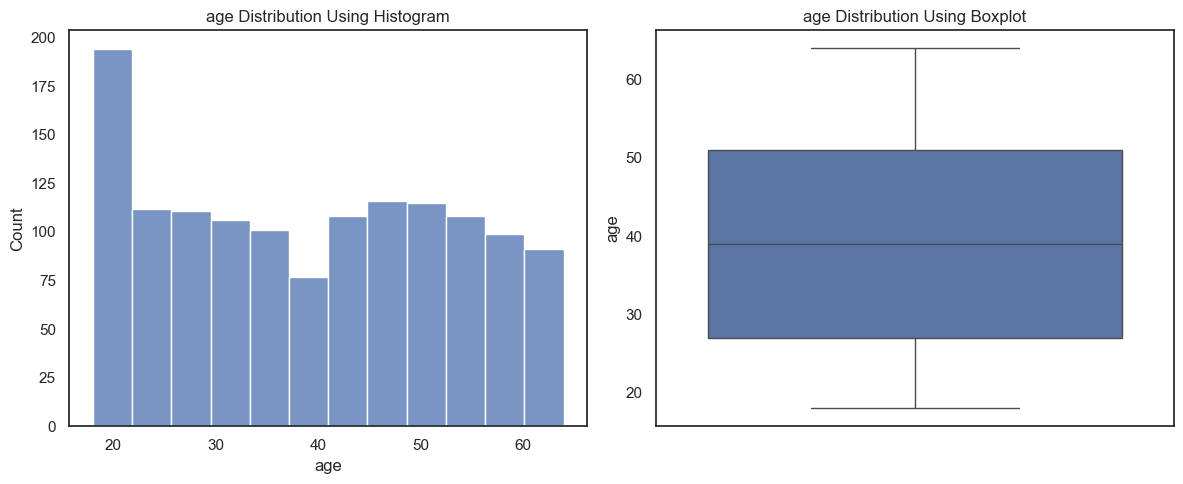

In [341]:
#Visualize the distribution of age
plot('age')

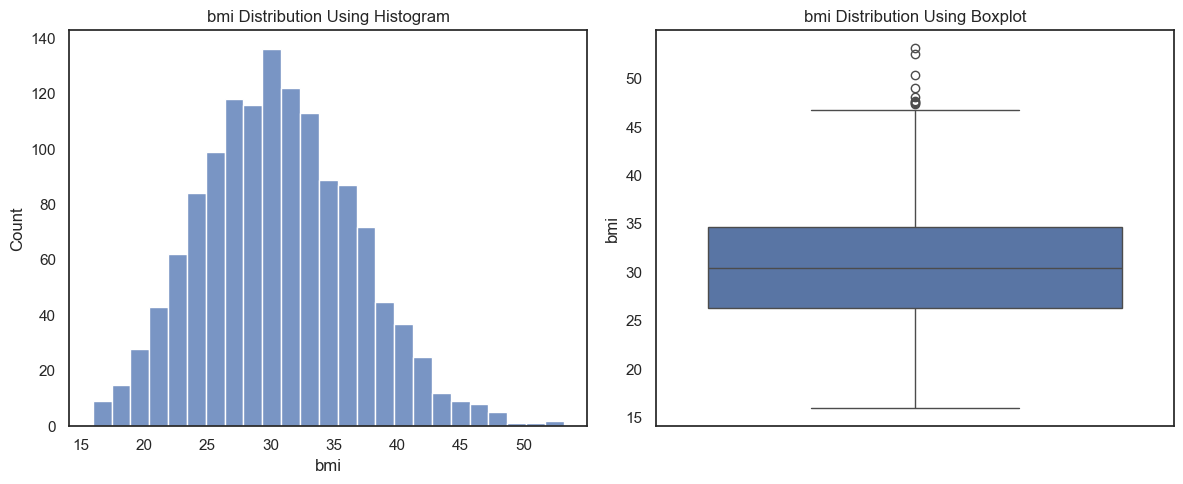

In [342]:
#Visualize the distribution of BMI
plot('bmi')

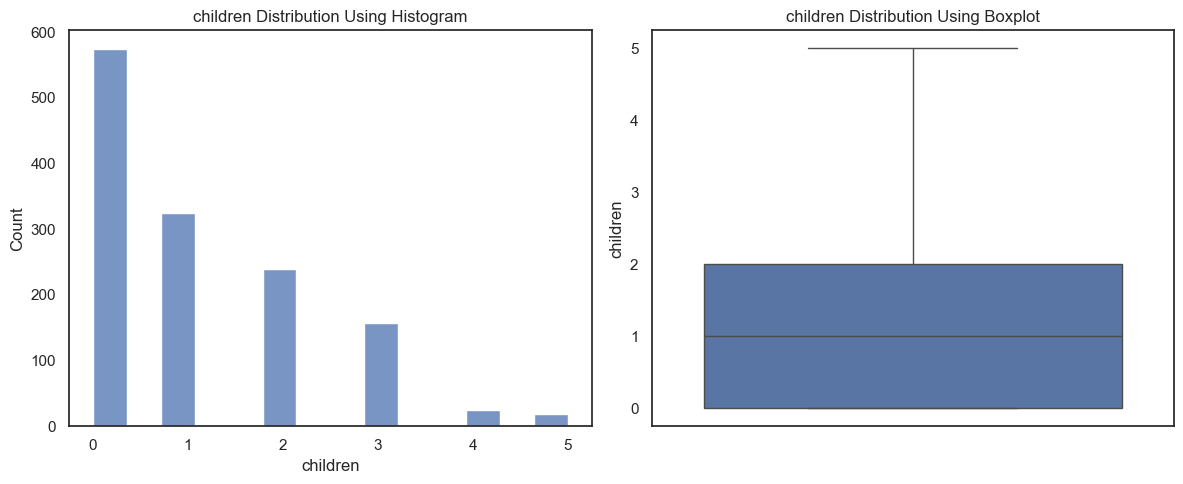

In [343]:
#Visualize the distribution of children
plot('children')

In [344]:
#Create a function to visualize categorical variables
def plot(column):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    sns.countplot(x=df[column], ax=axs[0])
    axs[0].set_title(f'Num of Insurance Customers by {column}')
    for p in axs[0].patches:
        axs[0].annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', 
                        fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    data = df[column].value_counts()
    axs[1].pie(data.values, labels=data.index, autopct="%1.2f%%", startangle=90)
    axs[1].set_title(f'Customers {column} Percentage')

    fig.tight_layout()
    plt.show()

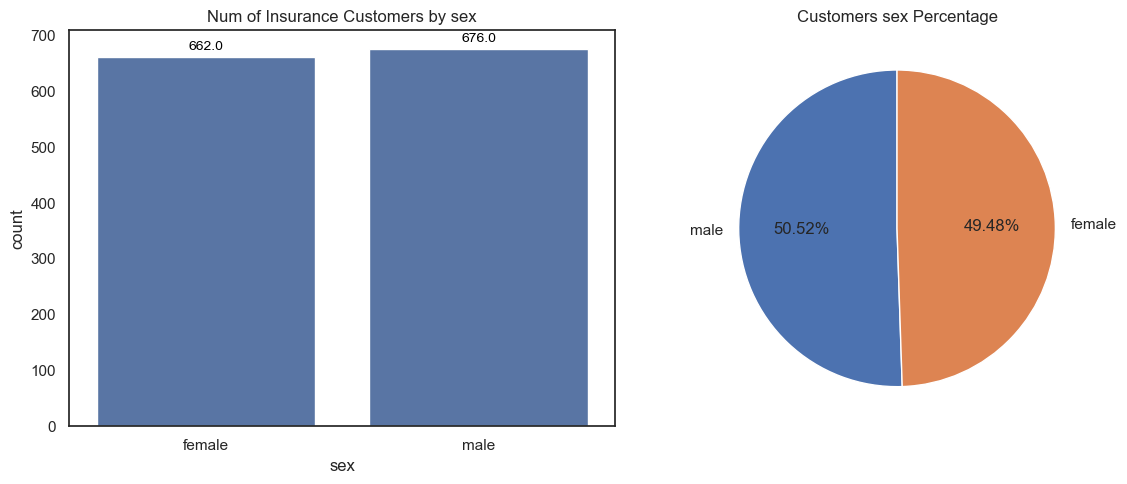

In [345]:
#Visualize the num of insurance customers by their sex
plot('sex')

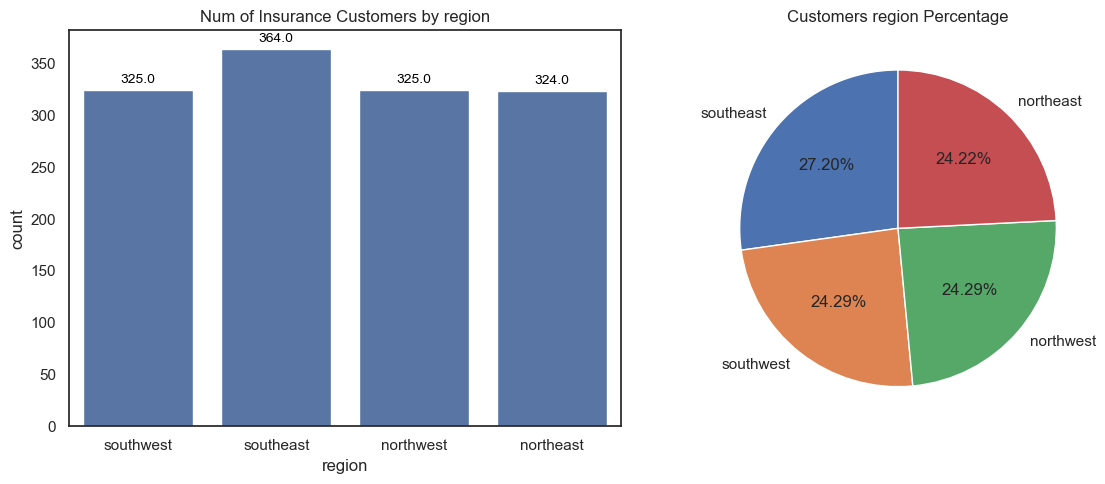

In [346]:
#Visualize the num of insurance customers by their region
plot('region')

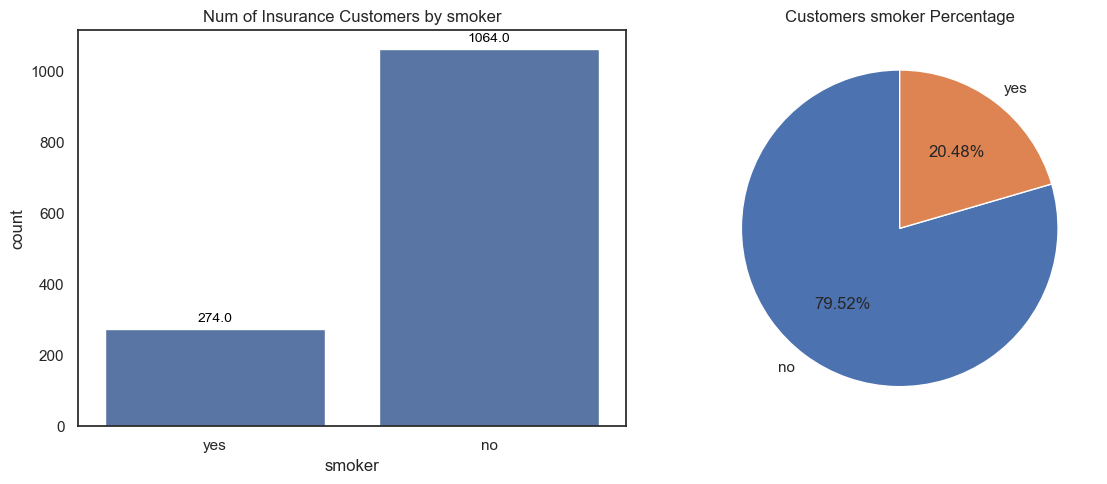

In [347]:
#Visualize the num of insurance customers by their smoker
plot('smoker')

## Analyzing Charges Based on Category

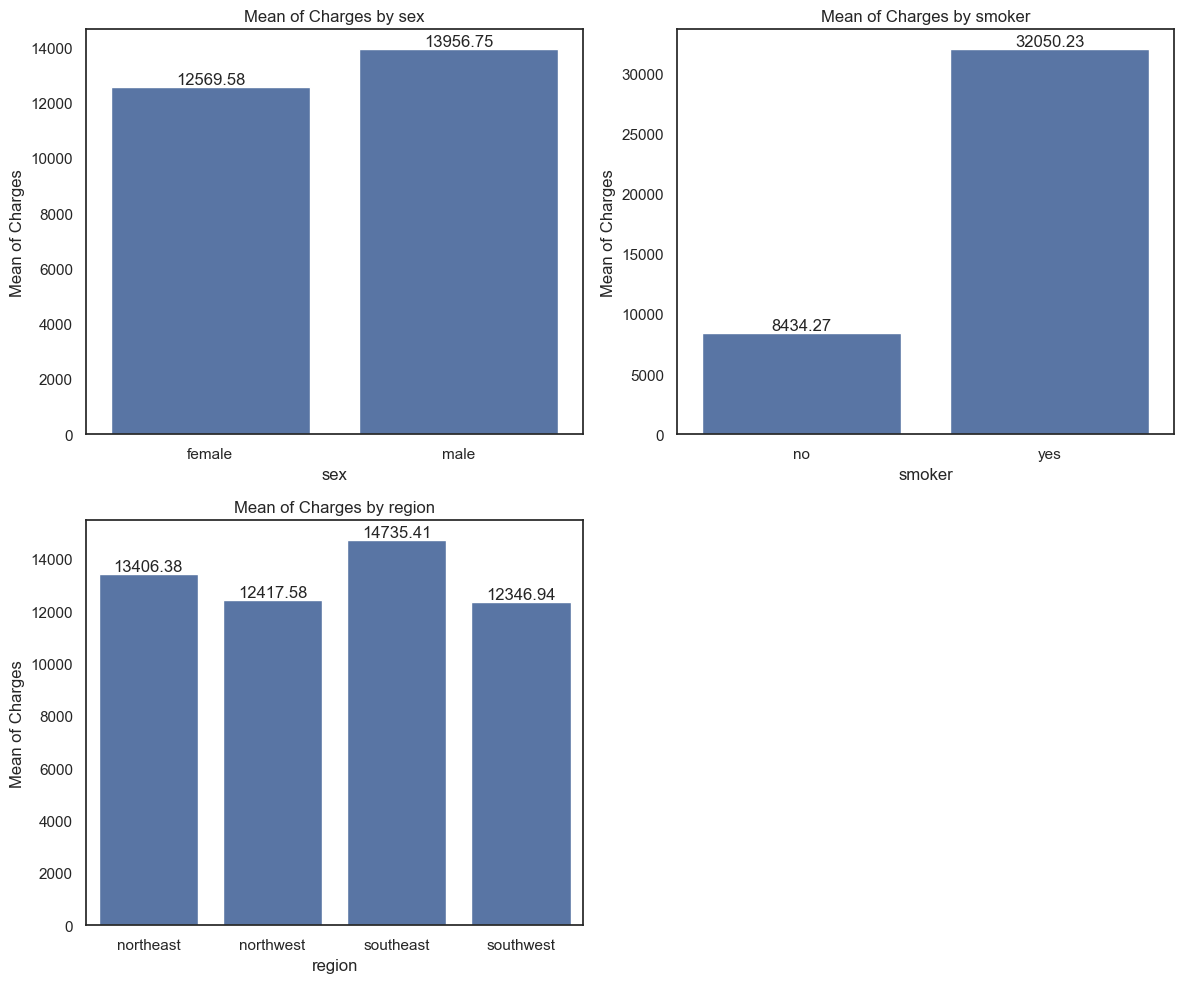

In [349]:
def charges_by(column, ax):
    data = df.groupby(column)['charges'].mean().reset_index(name='Mean of Charges')
    a = sns.barplot(data=data, x=column, y='Mean of Charges', ax=ax)
    for p in a.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,  
            f'{height:.2f}',
            ha="center", 
            va="bottom"  
        )
    
    ax.set_title(f'Mean of Charges by {column}')

num_cols = len(cat)
num_rows = (num_cols + 1) // 2  
fig, axs = plt.subplots(num_rows, 2, figsize=(12,10))
axs = axs.flatten()

for i, column in enumerate(cat):
    charges_by(column, axs[i])

for j in range(len(cat), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  
plt.show()

## Correlation

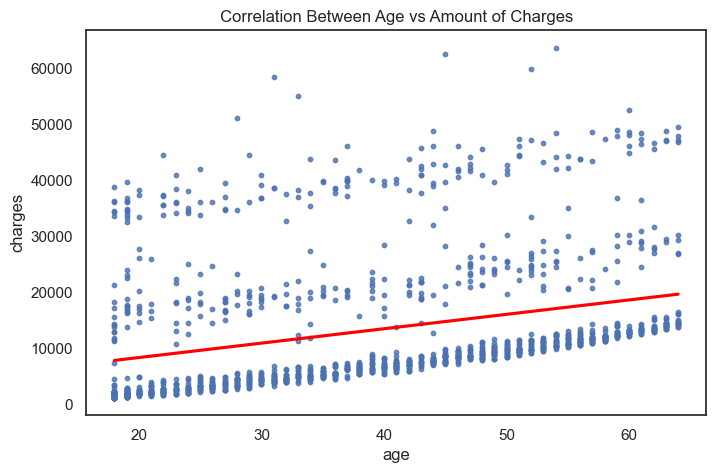

In [351]:
plt.figure(figsize=(8,5))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title("Correlation Between Age vs Amount of Charges")
plt.show()

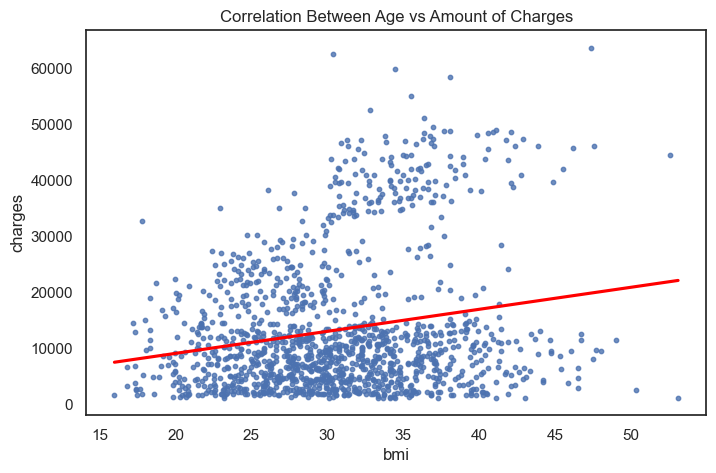

In [352]:
plt.figure(figsize=(8,5))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title("Correlation Between Age vs Amount of Charges")
plt.show()

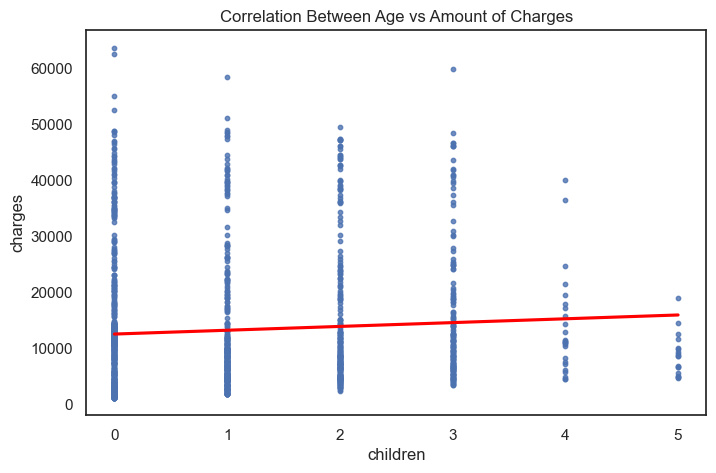

In [353]:
plt.figure(figsize=(8,5))
sns.regplot(x='children', y='charges', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title("Correlation Between Age vs Amount of Charges")
plt.show()

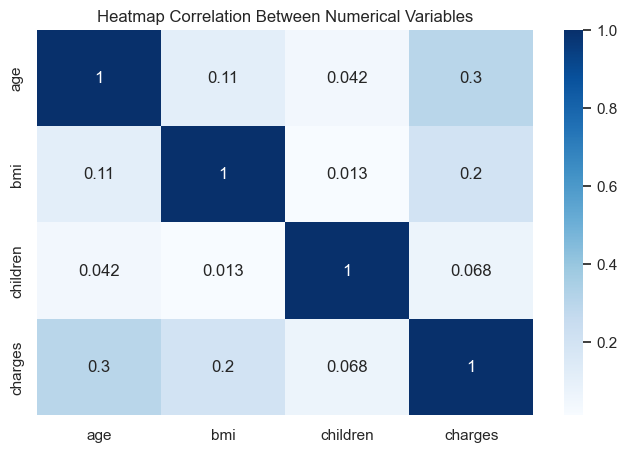

In [354]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Heatmap Correlation Between Numerical Variables")
plt.show()

# Data Preprocessing

In [356]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


## Remove Duplicated Row

In [358]:
df.drop_duplicates(inplace=True)

## Remove Outliers

In [360]:
#Import library for removing outliers
from scipy import stats
import numpy as np

#Collect all of the numerical data
num = df.select_dtypes(include='number').columns.tolist()

#Count the z score
z_score = np.abs(stats.zscore(df[num]))

#Set the treshold
treshold = 3

#Define the outliers where the z score is larger than treshold
outliers = np.where(z_score>treshold)[0]

#Removing outliers
print('Dataset before removing outliers:', df.shape)
df = df.drop(df.index[outliers])
print('Dataset after removing outliers:', df.shape)

Dataset before removing outliers: (1337, 7)
Dataset after removing outliers: (1308, 7)


## Labelling Categorical Features

In [362]:
#Create a numerical label for sex column
df['sex'] = df['sex'].map({'male':1, 'female':0})

#Create a numerical label for smoker column
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [363]:
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.92,False,False,False,True
1,18,1,33.77,1,0,1725.55,False,False,True,False
2,28,1,33.00,3,0,4449.46,False,False,True,False
3,33,1,22.70,0,0,21984.47,False,True,False,False
4,32,1,28.88,0,0,3866.86,False,True,False,False


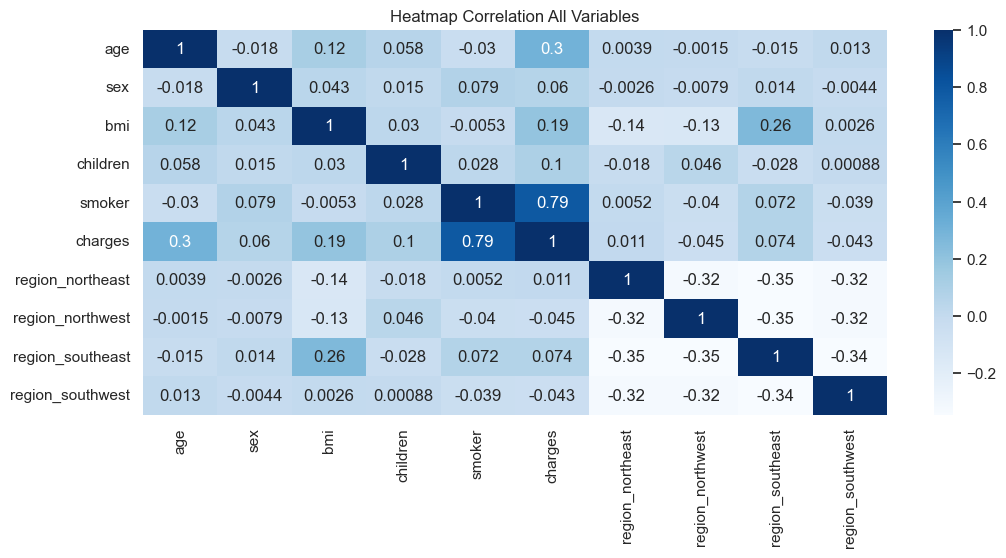

In [364]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Heatmap Correlation All Variables")
plt.show()

## Split the Dataset

In [366]:
#Split the dataset into feature and target
X = df.drop("charges", axis=1)
y = df['charges']

# Machine Learning Model

In [368]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split

## Cross Validation & Model Selection

In [370]:
# Dictionary to store the cross-validation results
cv_results = {}

# Cross-validation for each model
for model_name, model in models.items():
    mae_train_scores = []
    mae_test_scores = []

    # Initialize KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict on training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for training data (MAE)
        mae_train_scores.append(mean_absolute_error(y_train, y_train_pred))

        # Calculate metrics for testing data (MAE)
        mae_test_scores.append(mean_absolute_error(y_test, y_test_pred))

    # Store results for the current model
    cv_results[model_name] = {
        'Train MAE': mae_train_scores,
        'Test MAE': mae_test_scores
    }

# Convert the results into a DataFrame
cv_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Train MAE Mean': [sum(cv_results[model]['Train MAE']) / len(cv_results[model]['Train MAE']) for model in cv_results],
    'Test MAE Mean': [sum(cv_results[model]['Test MAE']) / len(cv_results[model]['Test MAE']) for model in cv_results]
})

# Display the cross-validation result
pd.options.display.float_format = '{:.2f}'.format
cv_df['Gap'] = np.abs(cv_df['Train MAE Mean'] - cv_df['Test MAE Mean'])
cv_df

,Model,Train MAE Mean,Test MAE Mean,Gap
0,Random Forest,969.58,2592.99,1623.41
1,Gradient Boosting,1959.56,2452.15,492.60
2,Decision Tree,18.15,2852.72,2834.57
3,Linear Regression,4086.32,4121.31,34.98
4,XGBoost,410.51,2924.44,2513.93


## Linear Regression

In [372]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Initialize and fit the selected model (Linear Regression)
model = LinearRegression().fit(X_train, y_train)

#Make a prediction
y_pred = model.predict(X_test)

## Evaluate the Model

In [374]:
#Count the r2 score
print("R2 score:", 100*round(r2_score(y_test, y_pred),4), '%')

#Count the MAE
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred),2))

#Count the MSE
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred),2))

R2 score: 78.27 %
Mean Absolute Error: 4039.96
Mean Squared Error: 30455102.02


## Regularization

In [432]:
# Create different regularization models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
lasso_model = Lasso(alpha=1.0)  # Adjust alpha as needed

# Fit the models to your training data
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate the models on a testing set
linear_model_score = linear_model.score(X_test, y_test)
ridge_model_score = ridge_model.score(X_test, y_test)
lasso_model_score = lasso_model.score(X_test, y_test)

# Choose the model with the best performance
best_model = None
best_score = -1
if linear_model_score > best_score:
    best_model = linear_model
    best_score = linear_model_score
if ridge_model_score > best_score:
    best_model = ridge_model
    best_score = ridge_model_score
if lasso_model_score > best_score:
    best_model = lasso_model
    best_score = lasso_model_score

# Use the best model for predictions
y_pred = best_model.predict(X_test)

In [458]:
#Create a dataframe
compare_model = pd.DataFrame()
compare_model['Model'] = ['Linear', 'Ridge', 'Lasso']
compare_model['MSE'] = [mean_squared_error(y_test, linear_model.predict(X_test)), mean_squared_error(y_test, ridge_model.predict(X_test)), mean_squared_error(y_test, lasso_model.predict(X_test))]
compare_model['R2 Score'] = [100*r2_score(y_test, linear_model.predict(X_test)), 100*r2_score(y_test, ridge_model.predict(X_test)), 100*r2_score(y_test, lasso_model.predict(X_test))]

#Show the result
pd.set_option('display.float_format', '{:.4f}'.format)
compare_model

,Model,MSE,R2 Score
0,Linear,30455102.0231,78.2737
1,Ridge,30481118.8319,78.2551
2,Lasso,30455706.6495,78.2733


## Plot the Model

In [550]:
#Create a function to visualize/plot model 
def plot(model, X_test, y_test, title):
    #Make a prediction for each model
    y_pred = model.predict(X_test)
    
    #Count the reisudal
    resid = y_pred - y_test
    
    #Create a subplot consits 2 rows and 2 columns
    fig, axs = plt.subplots(2,2, figsize=(12,8))

    #Visualize the residual using histogram
    sns.histplot(resid, ax=axs[0,0], kde=True, bins=20)
    axs[0,0].set_title(f'Residual Plot in {title}')
    axs[0,0].set_ylabel('Frequency')
    axs[0,0].set_xlabel('Residual')

    #Visualize actual vs predicted on scatterplot
    sns.scatterplot(x=y_test, y=y_pred, ax=axs[0,1])
    axs[0,1].set_title(f'Actual vs Predicted Plot in {title}')
    axs[0,1].set_ylabel('Actual')
    axs[0,1].set_xlabel('Predicted')

    #Visualize predicted  vs residual on scatterplot
    sns.scatterplot(x=y_pred, y=resid, ax=axs[1,0])
    axs[1,0].set_title(f'Residual vs Predicted Plot in {title}')
    axs[1,0].set_ylabel('Residual')
    axs[1,0].set_xlabel('Predicted')

    #Delete unused axs
    fig.delaxes(axs[1,1])

    #Show the visualization
    fig.tight_layout()
    plt.show()

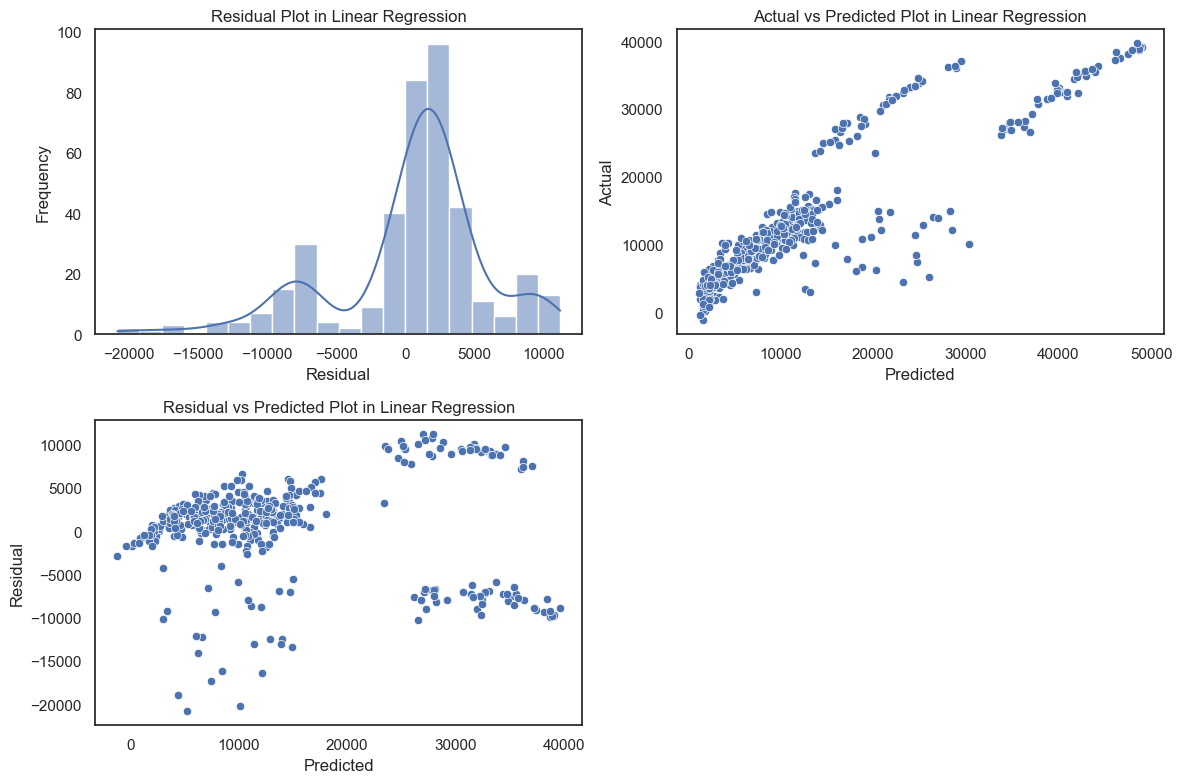

In [552]:
plot(linear_model, X_test, y_test, "Linear Regression")

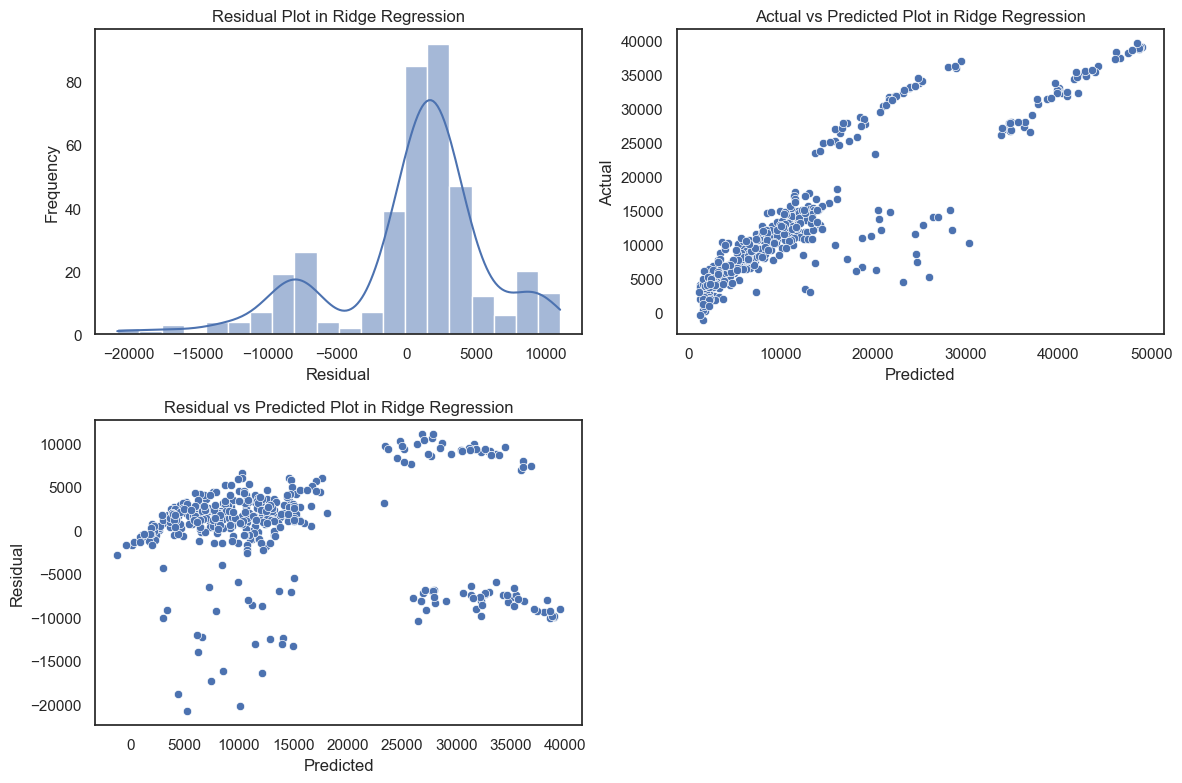

In [554]:
plot(ridge_model, X_test, y_test, "Ridge Regression")

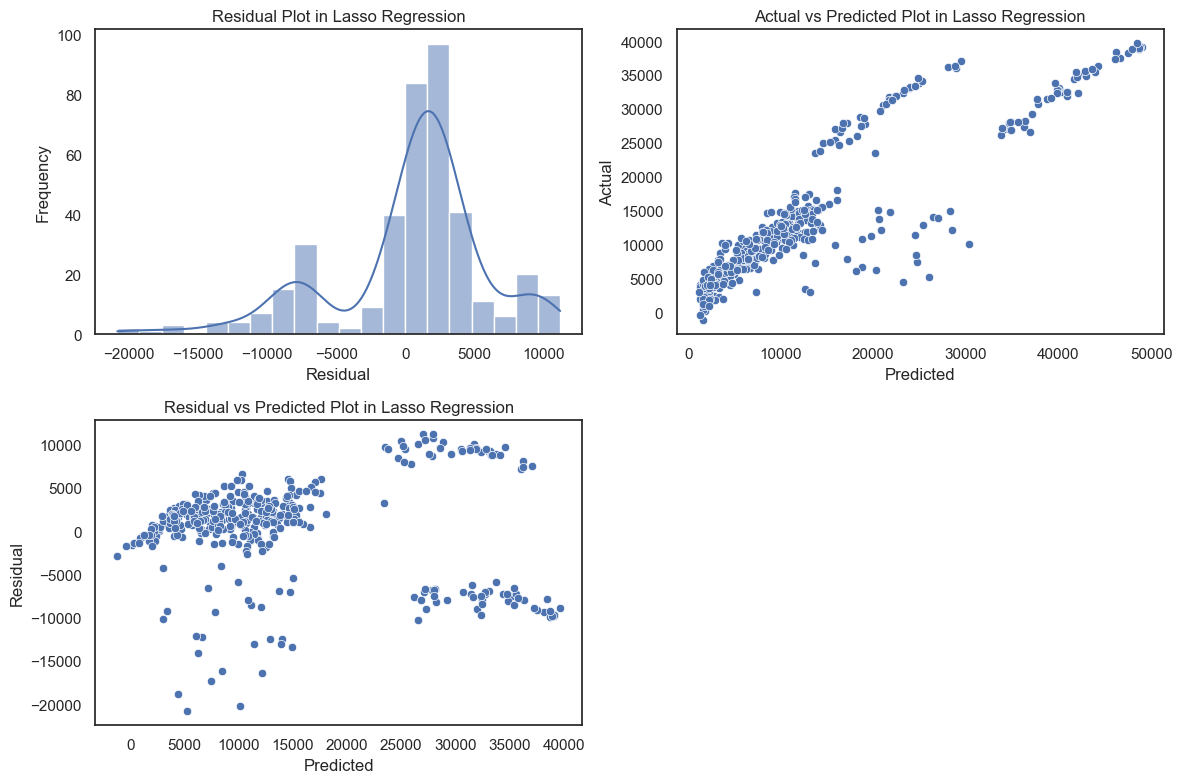

In [556]:
plot(lasso_model, X_test, y_test, "Lasso Regression")

## Analyzing Feature Importances

In [565]:
coef = linear_model.coef_
fi = pd.DataFrame()
fi['Features'] = X.columns
fi['Coefficient'] = coef
fi = fi.sort_values(by='Coefficient', ascending=False)
fi

,Features,Coefficient
4,smoker,23048.2268
5,region_northeast,717.7856
3,children,550.3921
2,bmi,300.5725
0,age,253.5388
6,region_northwest,-13.6330
8,region_southwest,-194.6181
1,sex,-261.8987
7,region_southeast,-509.5346


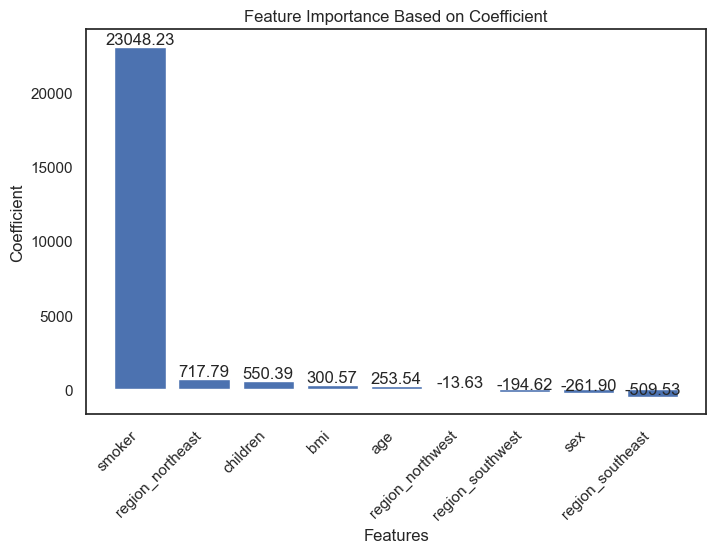

In [567]:
# Create a figure with desired size
plt.figure(figsize=(8, 5))

# Create the bar plot
bars = plt.bar(fi['Features'], fi['Coefficient'])

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance Based on Coefficient")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')  # Adding label on top of bar

# Display the plot
plt.show()

**Interpretation:**

1. **Smoker (23048.2268)**: The very high positive coefficient for the "smoker" feature indicates that smokers face significantly higher insurance charges. This is because smoking is associated with increased health risks and costs. Insurance companies charge higher premiums for smokers to account for the greater likelihood of health issues and associated medical expenses.

2. **BMI (300.5725)**: The positive coefficient for BMI suggests that individuals with a higher Body Mass Index are also charged more for insurance. This reflects the fact that a higher BMI is linked to various health problems, which can lead to higher medical costs. Insurance companies adjust premiums based on the increased risk and potential costs associated with higher BMI.

3. **Children (550.3921)**: The positive coefficient for the number of children implies that having more children increases insurance charges. This could be due to the higher cost of health care for dependents, as insurance policies often cover family members. More children mean higher potential claims and costs, which can lead to increased prey family size.

These top three features are crucial as they show strong and clear relationships with the target variable, highlighting important factors such as smoking, BMI, and family size.